## Imports

In [1]:
# Main imports
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string
import plotly.graph_objects as go


# sklearn models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline


# Other relevant imports
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

pd.set_option('max_rows',None)
%matplotlib inline
sns.set()

In [2]:
# Loading the necessary datasets
df = pd.read_csv('../data/df_clean.csv')
#XXX = pd.read_csv('./data/XXXX.csv')
#XXX = pd.read_csv('./data/XXX.csv')

In [3]:
df.head().T

,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Nationality,Argentina,Portugal,Brazil,Spain,Belgium
Overall,94,94,92,91,91
Potential,94,94,93,93,92
Club,FC Barcelona,Juventus,Paris Saint-Germain,Manchester United,Manchester City
Value,1.105e+08,7.7e+07,1.185e+08,7.2e+07,1.02e+08
Wage,565000,405000,290000,260000,355000
Preferred Foot,Left,Right,Right,Right,Right


In [4]:
#df.dtypes

In [5]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Contract Expiration', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

### Pre-Processing

### Feature Engineering

In [6]:
# Categorize players' positions 
# Adapted from Nitin Datta

def main_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'FB'
    elif ((df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') ):
        return 'CB'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'CDM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'RM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'WING'
    elif ((df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') ):
        return 'CM'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') ):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

In [7]:
df['Main Position'] = df.apply(main_position,axis = 1)

In [8]:
df['Main Position'].unique()

array(['ST', 'WING', 'GK', 'CM', 'CB', 'CDM', 'AM', 'FB'], dtype=object)

In [9]:
# Binarize Preferred Foot
df['Preferred Foot'] = df['Preferred Foot'].apply(lambda x: 1 if x  == 'Right' else 0)

In [10]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Main Position
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,ST
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,1,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,ST
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,1,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,WING
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,GK
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,1,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,CM


In [11]:
#df.to_csv('../data/df_rs3.csv', index=False)

In [12]:
#df1 = df.copy()

In [13]:
category = df.select_dtypes(include = 'object').columns

In [14]:
category

Index(['Name', 'Nationality', 'Club', 'Work Rate', 'Body Type', 'Position',
       'Height', 'Weight', 'Main Position'],
      dtype='object')

In [15]:
high_corr = (abs(df.corr()[['Value']])>0.20)['Value']
high_corr

ID                          False
Age                         False
Overall                      True
Potential                    True
Value                        True
Wage                         True
Preferred Foot              False
International Reputation     True
Weak Foot                   False
Skill Moves                  True
Contract Expiration          True
Crossing                     True
Finishing                    True
HeadingAccuracy             False
ShortPassing                 True
Volleys                      True
Dribbling                    True
Curve                        True
FKAccuracy                   True
LongPassing                  True
BallControl                  True
Acceleration                False
SprintSpeed                 False
Agility                     False
Reactions                    True
Balance                     False
ShotPower                    True
Jumping                     False
Stamina                      True
Strength      

In [16]:
corr_20 = df.corr()[['Value']][high_corr].index
corr_20

Index(['Overall', 'Potential', 'Value', 'Wage', 'International Reputation',
       'Skill Moves', 'Contract Expiration', 'Crossing', 'Finishing',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Reactions', 'ShotPower', 'Stamina',
       'LongShots', 'Positioning', 'Vision', 'Penalties', 'Composure'],
      dtype='object')

In [17]:
#df.corr()['Value'].sort_values(ascending=False)

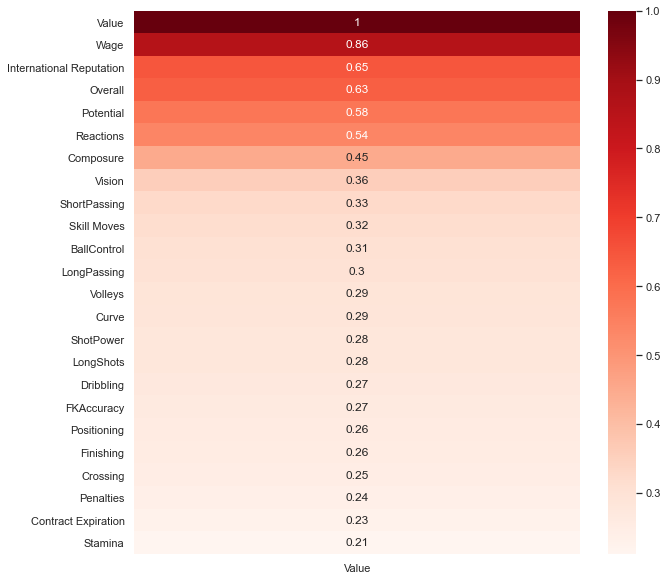

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()[['Value']].sort_values('Value', ascending=False).head(24), annot=True, cmap='Reds');

In [19]:
df_cat = pd.get_dummies(df[['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Main Position']])

In [20]:
df_cat_heatmap = pd.concat([df.Value, df_cat], axis = 1)

In [21]:
#df_cat_heatmap = pd.concat([df.Value, pd.get_dummies(df[['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 
 #                                                 'Position']])], axis = 1)

### Heatmap for Categorical Features

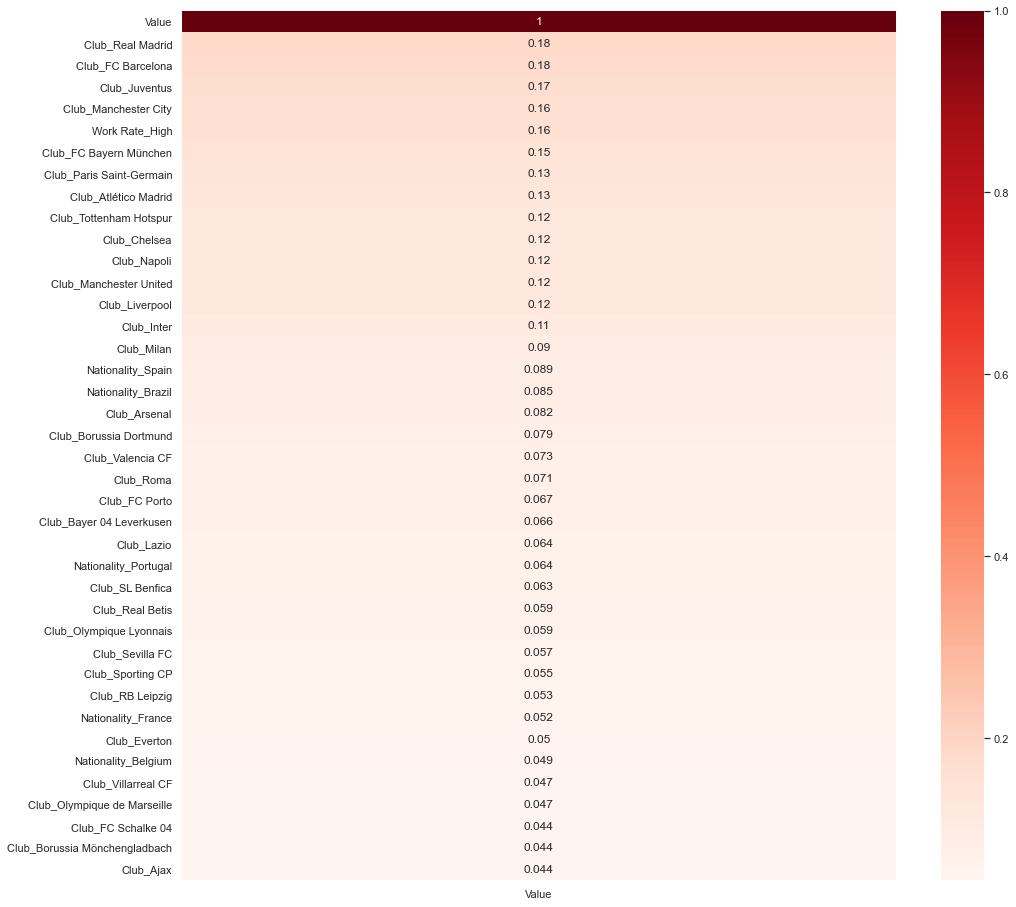

In [22]:
plt.figure(figsize=(16,16))
sns.heatmap(df_cat_heatmap.corr()[['Value']].sort_values('Value', ascending=False).head(40), annot=True, cmap='Reds');

As seen from the heatmap above, the clubs with the highest correlation to a players' value are Real Madrid, Barcelona, Juventus. For work rate, the highest correlations are High/High and High/Medium. As for nationality, players from Spain or Brazil have the highest correlation with value.

In [20]:
# Dummify Categorical Variables
# drop_first=True

#df = pd.concat([df, pd.get_dummies(df[['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Position',
#                                      'Contract Valid Until']])], axis = 1)
#df.drop(['ID', 'Name', 'GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes',
#                    'Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Position',
     #                                 'Contract Valid Until', 'Height', 'Weight', ], axis=1, inplace=True)
#df.head()

### Modeling
### (1) Linear Regression
### (2) Random Forest Regression
### (3) Lasso Regression
### (4) Ridge Regression

In [ ]:
#https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

In [21]:
#X_validate_pred = X_test.drop(columns=['ID'])

In [23]:
# baseline accuracy
df["Value"].mean()

2410695.8861976163

For the modeling process, i will take features with >0.2 correlation with the target (Value).

In [24]:
df_num = df[['ID', 'Wage', 'International Reputation', 'Overall', 'Potential', 'Reactions', 'Composure', 'Vision',
         'ShortPassing', 'Skill Moves', 'BallControl', 'LongPassing', 'Volleys', 'Curve', 'ShotPower',
         'LongShots', 'Dribbling', 'FKAccuracy', 'Positioning', 'Finishing', 'Crossing', 'Penalties', 
          'Contract Expiration', 'Stamina']]

In [24]:
#X = df_num
#y = df['Value']

In [25]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
#X_train.shape

In [25]:
df2 = pd.concat([df_num, df_cat], axis = 1)

In [27]:
#df2.columns

In [ ]:
#df2.drop(['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Position',
 #        'Contract Valid Until'], axis=1, inplace=True)

In [ ]:
#df1 = pd.concat([df1, pd.get_dummies(df[['Name']],drop_first=True)], axis = 1)
#df1.drop(['Name'], axis=1, inplace=True)

In [28]:
df2.head()

,ID,Wage,International Reputation,Overall,Potential,Reactions,Composure,Vision,ShortPassing,Skill Moves,...,Body Type_Normal,Body Type_Stocky,Main Position_AM,Main Position_CB,Main Position_CDM,Main Position_CM,Main Position_FB,Main Position_GK,Main Position_ST,Main Position_WING
0,158023,565000.0,5.0,94,94,95.0,96.0,94.0,90.0,4.0,...,0,0,0,0,0,0,0,0,1,0
1,20801,405000.0,5.0,94,94,96.0,95.0,82.0,81.0,5.0,...,0,1,0,0,0,0,0,0,1,0
2,190871,290000.0,5.0,92,93,94.0,94.0,87.0,84.0,5.0,...,0,0,0,0,0,0,0,0,0,1
3,193080,260000.0,4.0,91,93,90.0,68.0,68.0,50.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,192985,355000.0,4.0,91,92,91.0,88.0,94.0,92.0,4.0,...,1,0,0,0,0,1,0,0,0,0


In [29]:
#df1 = df.drop(columns = 'Value')
X = df2
y = df['Value']
#X_val =

In [29]:
# X = XXX
# y = XXX

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
X_val = X_test.copy()

In [32]:
X_train.drop(['ID'], axis=1, inplace=True)
X_test.drop(['ID'], axis=1, inplace=True)

In [40]:
X_test.head()

,Wage,International Reputation,Overall,Potential,Reactions,Composure,Vision,ShortPassing,Skill Moves,BallControl,...,Body Type_Normal,Body Type_Stocky,Main Position_AM,Main Position_CB,Main Position_CDM,Main Position_CM,Main Position_FB,Main Position_GK,Main Position_ST,Main Position_WING
5848,8000.0,1.0,69,77,66.0,41.0,42.0,33.0,1.0,24.0,...,1,0,0,0,0,0,0,1,0,0
14634,2000.0,1.0,61,61,53.0,60.0,43.0,48.0,2.0,56.0,...,1,0,0,0,0,0,0,0,1,0
11807,3000.0,1.0,64,68,53.0,42.0,13.0,25.0,1.0,16.0,...,1,0,0,0,0,0,0,1,0,0
5826,18000.0,1.0,69,69,66.0,73.0,66.0,69.0,2.0,69.0,...,0,0,0,1,0,0,0,0,0,0
1989,24000.0,1.0,75,80,69.0,68.0,79.0,74.0,3.0,75.0,...,1,0,0,0,1,0,0,0,0,0


In [41]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [42]:
X_train_scaled[:2, :2]

array([[-0.35841632, -0.29551156],
       [-0.4048643 , -0.29551156]])

In [43]:
X_test_scaled[:2, :2]

array([[-0.07972846, -0.29551156],
       [-0.35841632, -0.29551156]])

#### Linear Regression

In [44]:
# Linear Regression
lr = LinearRegression()
cross_val_score(lr, X_train_scaled, y_train, cv=5).mean()

-5.141149254632236e+25

In [45]:
cross_val_score(lr, X_test_scaled, y_test, cv=5).mean()

-2.0420590434240957e+26

#### Lasso CV

In [46]:
lasso = LassoCV(cv=5)
cross_val_score(lasso, X_train_scaled, y_train, cv=5).mean()

0.8113701917887127

In [47]:
cross_val_score(lasso, X_test_scaled, y_test, cv=5).mean()

0.8123813662146457

#### Ridge CV

In [48]:
ridge = RidgeCV()
cross_val_score(ridge, X_train_scaled, y_train, cv=5).mean()

0.8102050487691204

In [49]:
cross_val_score(ridge, X_test_scaled, y_test, cv=5).mean()

0.8130673897116705

#### Random Forest

In [50]:
rf = RandomForestRegressor(n_estimators=150,random_state=42)
cross_val_score(rf, X_train_scaled, y_train, cv=5).mean()

0.9603803418408884

In [51]:
cross_val_score(rf, X_test_scaled, y_test, cv=5).mean()

0.9532809737176674

In [63]:
#from sklearn.neighbors import KNeighborsRegressor
#knn = KNeighborsRegressor(n_neighbors=20)
#cross_val_score(knn, X_train_scaled, y_train, cv=5).mean()

In [62]:
#cross_val_score(knn, X_test_scaled, y_test, cv=5).mean()

The above shows a rough illustration of how the models would perform on unrecognised data as they have not been fitted yet. Linear regression is clearly not suitable while Lasso and Ridge regression have very close scores. 

### (1) Linear Regression

In [56]:
#lr = LinearRegression()
#lr.fit(X_train, y_train)

In [27]:
# predict on test set
#pred_lr = lr.predict(X_test)
#lr_r2_score = metrics.r2_score(y_test, pred_lr)
#lr_r2_score

In [55]:
# Generating scores
##train_lr = lr.score(X_train, y_train)
#print(f'Linear Regression Train Score:', train_lr)

#pred_lr = lr.predict(X_test)
#r2_lr = metrics.r2_score(y_test, pred_lr)
#print(f'Linear Regression r2 Score:', r2_lr)

#accuracy_lr = lr.score(X_test, y_test)
#print(f'Linear Regression Accuracy Score:', accuracy_lr)
#var_lr = train_lr - accuracy_lr
#print(f'Linear Regression Variance:', var_lr)
#crossval_lr = cross_val_score(lr, X_train, y_train, cv=3).mean()
#print(f'Linear Regression Cross Validation Score:', crossval_lr)

In [57]:
#np.sqrt(mean_squared_error(y_test, pred_lr))
#from sklearn.metrics import mean_squared_error

#pred_lr = lr.predict(X_test)

#rmse = mean_squared_error(y_test, pred_lr, squared=False)
#rmse

In [64]:
#pred_lr

In [65]:
#Visualising the results
#plt.figure(figsize=(10,8))
#sns.regplot(pred_lr,y_test)
#plt.xlabel('Predictions')
#plt.ylabel('Actual')
#plt.title("Linear Prediction of Player Value")
#plt.show()

### Random Forest

In [52]:
# Training the Random Forest regression on the training model
rf = RandomForestRegressor(n_estimators=150,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [ ]:
#def rf_pipe_func(pipe, params):
#    ''' Function to execute Gridsearch CV to find
#        best parameters for Random Forest model.
#        Output returns the relevant scores'''
#    gs_rf = GridSearchCV(estimator=pipe, param_grid=params, cv=5, verbose=1, n_jobs=6)
#    gs_rf.fit(X_train, y_train)
#    train_rf = gs_rf.score(X_train, y_train)
#    print(f'Training Score:', train_rf)
#    y_pred_rf = gs_rf.best_estimator_.predict(X_test)
#    accuracy_rf = accuracy_score(y_pred_rf, y_test)
#    print(f"Accuracy Score:", accuracy_rf)
#    var_rf = train_score_rf - accuracy_rf
#    print(f"Variance:", var_rf)
#    crossval_rf = gs_rf.best_score_
#    print(f'CrossVal Score:', crossval_rf)
#    y_pred_prob_rf = gs_rf.best_estimator_.predict_proba(X_test)[:, 1]
#    print(f'Best Params:{gs_rf.best_params_}')
#    return gs_rf

In [ ]:
#rf_pipe = Pipeline([
#    ("rand_for", RandomForestRegressor(random_state=42))])

#rf_params = {
#    "rand_for__n_estimators": [50, 100, 150],
#    "rand_for__max_depth": [100, 200, 300],
#    "rand_for__min_samples_split": [5, 25, 50],}

# running the gridsearch on the whole thing
#rf_model = rf_pipe_func(rf_pipe, rf_params)

In [53]:
 # Generating scores
train_rf = rf.score(X_train, y_train)
print(f'Random Forest Train Score:', train_rf)

accuracy_rf = rf.score(X_test, y_test)
print(f'Random Forest Accuracy Score:', accuracy_rf)
var_rf = train_rf - accuracy_rf
print(f'Random Forest Variance:', var_rf)
crossval_rf = cross_val_score(rf, X_train, y_train, cv=5).mean()
print(f'Random Forest Cross Validation Score:', crossval_rf)

Random Forest Train Score: 0.9946085651704998
Random Forest Accuracy Score: 0.9724478779553667
Random Forest Variance: 0.02216068721513309
Random Forest Cross Validation Score: 0.9604495477235122


In [61]:
rf_pred = rf.predict(X_test)
rf_pred[30:33]

array([ 835833.33333333,  522500.        , 9960000.        ])

In [58]:
X_val[30:33]

,ID,Wage,International Reputation,Overall,Potential,Reactions,Composure,Vision,ShortPassing,Skill Moves,...,Body Type_Normal,Body Type_Stocky,Main Position_AM,Main Position_CB,Main Position_CDM,Main Position_CM,Main Position_FB,Main Position_GK,Main Position_ST,Main Position_WING
10221,244037,1000.0,1.0,65,74,69.0,57.0,64.0,62.0,3.0,...,0,0,1,0,0,0,0,0,0,0
12627,239504,2000.0,1.0,63,70,56.0,57.0,57.0,56.0,2.0,...,1,0,0,0,0,0,0,0,1,0
856,182945,32000.0,2.0,78,78,75.0,78.0,74.0,74.0,4.0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
#X_val.iloc[:,0]

In [64]:
id_col = pd.DataFrame(X_val.iloc[:,0])
rf_preds = pd.DataFrame(rf_pred)

In [79]:
id_col = id_col.reset_index(drop=True)
#id_col.drop(['index'], axis=1, inplace=True)
#id_col.head()

In [80]:
id_col.head()

,ID
0,229692
1,239605
2,214981
3,189235
4,204497


In [81]:
id_col.head(10)

,ID
0,229692
1,239605
2,214981
3,189235
4,204497
5,237631
6,244538
7,189839
8,226416
9,217758


In [82]:
rf_preds.head(10)

,0
0,1.181500e+06
1,1.924333e+05
2,4.141667e+05
3,6.758000e+05
4,8.690000e+06
5,4.770000e+06
6,3.488333e+05
7,4.786333e+05
8,3.985667e+05
9,8.251667e+05


In [83]:
prediction_df = pd.concat([id_col, rf_preds], axis=1)
prediction_df.rename(columns={0: 'Value'}, inplace=True)
prediction_df.head(10)

,ID,Value
0,229692,1.181500e+06
1,239605,1.924333e+05
2,214981,4.141667e+05
3,189235,6.758000e+05
4,204497,8.690000e+06
5,237631,4.770000e+06
6,244538,3.488333e+05
7,189839,4.786333e+05
8,226416,3.985667e+05
9,217758,8.251667e+05


In [84]:
prediction_df.Value/1000

0        1181.500000
1         192.433333
2         414.166667
3         675.800000
4        8690.000000
5        4770.000000
6         348.833333
7         478.633333
8         398.566667
9         825.166667
10      11413.333333
11        544.333333
12        429.600000
13        498.066667
14       1169.266667
15       3436.000000
16       4044.666667
17       1246.166667
18        643.833333
19        886.666667
20       3934.666667
21        751.500000
22        480.900000
23        248.433333
24       1740.166667
25        243.366667
26        362.333333
27        574.500000
28         61.600000
29        801.833333
30        835.833333
31        522.500000
32       9960.000000
33       2181.000000
34        639.833333
35        939.166667
36       1951.500000
37       3450.000000
38        706.866667
39       7040.000000
40       1096.333333
41       8153.333333
42        343.800000
43        340.666667
44        141.933333
45        101.533333
46       1768.333333
47       1232

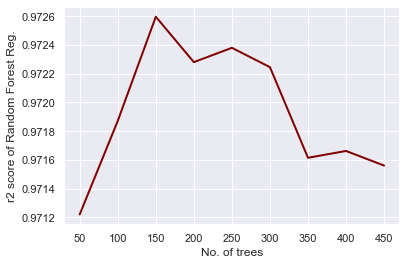

In [35]:
# Finding out the optimal number of trees for Random Forest Regression
# Adapted from aninditakarmakar


forestRange=range(50,500,50)
scores_list=[]
for i in forestRange: 
    rf = RandomForestRegressor(n_estimators=i,random_state=42)
    rf.fit(X_train,y_train)
    pred_rf = rf.predict(X_test)
    scores_list.append(r2_score(y_test,pred_rf))
plt.plot(forestRange,scores_list,linewidth=2,color='maroon')
plt.xticks(forestRange)
plt.xlabel('No. of trees')
plt.ylabel('r2 score of Random Forest Reg.')
plt.show() 

### Lasso

In [36]:
# Set up a list of Lasso alphas to check.
lasso = LassoCV(n_alphas=200)
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

# Fit model using best Lasso alpha!
lasso_cv.fit(X_train, y_train);

# Here is the optimal value of alpha
lasso_cv.alpha_

1.0

In [37]:
# Generating scores
train_lasso = lasso_cv.score(X_train, y_train)
print(f'Lasso Regression Train Score:', train_lasso)

#pred_lr = lr.predict(X_test)
#pred_lr = lr.predict(X_test)
#lr_r2 = metrics.r2_score(y_test, pred_lr)
#lr_r2

accuracy_lasso = lasso_cv.score(X_test, y_test)
print(f'Lasso Regression Accuracy Score:', accuracy_lasso)
var_lasso = train_lasso - accuracy_lasso
print(f'Lasso Regression Variance:', var_lasso)
crossval_lasso = cross_val_score(lasso_cv, X_train, y_train, cv=3).mean()
print(f'Lasso Regression Cross Validation Score:', crossval_lasso)

Lasso Regression Train Score: 0.841924778837233
Lasso Regression Accuracy Score: 0.8407582502075261
Lasso Regression Variance: 0.0011665286297068977
Lasso Regression Cross Validation Score: 0.818152317567625


In [38]:
# Predicting lasso on test set
pred_lasso = lasso_cv.predict(X_test)

Lasso Train Score: 0.841924778837233
Lasso Test Score: 0.8407582502075261


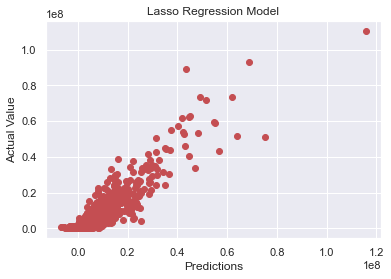

In [39]:
plt.scatter(pred_lasso, y_test, color='r')
plt.xlabel("Predictions")
plt.ylabel("Actual Value")
plt.title('Lasso Regression Model')

print("Lasso Train Score:", lasso_cv.score(X_train, y_train))
print("Lasso Test Score:", lasso_cv.score(X_test, y_test))

### Ridge Regression

In [40]:
# Set up a list of ridge alphas to check.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv.fit(X_train, y_train)

# Here is the optimal value of alpha
ridge_cv.alpha_

2.8480358684358014

In [41]:
# Generating scores
train_ridge = ridge_cv.score(X_train, y_train)
print(f'Rdige Regression Train Score:', train_ridge)

accuracy_ridge = ridge_cv.score(X_test, y_test)
print(f'Ridge Regression Accuracy Score:', accuracy_ridge)
var_ridge = train_ridge - accuracy_ridge
print(f'Ridge Regression Variance:', var_ridge)
crossval_ridge = cross_val_score(ridge_cv, X_train, y_train, cv=3).mean()
print(f'Ridge Regression Cross Validation Score:', crossval_ridge)

Rdige Regression Train Score: 0.8399146797335939
Ridge Regression Accuracy Score: 0.8429357889702891
Ridge Regression Variance: -0.0030211092366951853
Ridge Regression Cross Validation Score: 0.8196293762326136


Ridge Train Score: 0.8399146797335939
Ridge Test Score: 0.8429357889702891


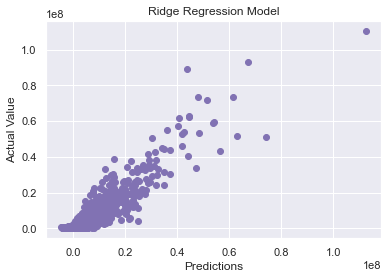

In [42]:
# Predicting ridge on test set
pred_ridge = ridge_cv.predict(X_test)

plt.scatter(pred_ridge, y_test, color='m')
plt.xlabel("Predictions")
plt.ylabel("Actual Value")
plt.title('Ridge Regression Model')

print("Ridge Train Score:", ridge_cv.score(X_train, y_train))
print("Ridge Test Score:", ridge_cv.score(X_test, y_test))

In [ ]:
#Visualising the results
plt.figure(figsize=(10,8))
sns.regplot(pred_lr,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Prediction of Player Value")
plt.show()

### Model Comparisons

In [43]:
# Create a df to compare results between models
first_pass_df = pd.DataFrame([[train_lr, train_rf, train_lasso, train_ridge],
                              [accuracy_lr, accuracy_rf, accuracy_lasso, accuracy_ridge],
                              [var_lr, var_rf, var_lasso, var_ridge],
                              [crossval_lr, crossval_rf, crossval_lasso, crossval_ridge]],
                              columns = ["Linear Regression", "Random Forest", "Lasso Regression", "Ridge Regression"], 
                              index=["Train Score", "Accuracy Score", "Variance", "Cross Val"])
first_pass_df

,Linear Regression,Random Forest,Lasso Regression,Ridge Regression
Train Score,8.419248e-01,0.994685,0.841925,0.839915
Accuracy Score,8.407436e-01,0.972597,0.840758,0.842936
Variance,1.181251e-03,0.022088,0.001167,-0.003021
Cross Val,-4.178489e+11,0.958710,0.818152,0.819629


### Best Model